# _**Data Visualization**_
# _**15 Plots Using Plotly Express**_

Author: Anwar Mehmood Sohail\
Date: 03 November, 2023\
Email: anwarmehmood.sohail@gmail.com

#dataviz #datavisualization #codanics

---

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Need to install kaleido for saving image as png, if not install `pip install -U kaleido`

In [3]:
# import iris dataset from sns/px
iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id'],
      dtype='object')

# 1. Scatter Plot:

In [19]:
fig = px.scatter(data_frame=iris, x='sepal_length', y= 'sepal_width')
fig.show()
fig.write_image('./output/01_scatter_a.png', scale = 3)  # add scale three for 300dpi (high resolution)

In [18]:
# add color attribute
fig = px.scatter(data_frame=iris, x='sepal_length', y= 'sepal_width', color='species')
fig.show()
fig.write_image('./output/01_scatter_b.png', scale = 3)  # add scale three for 300dpi (high resolution)

# 2. Line Plot:

In [15]:
# if we plot lineplot same on this data, we will get plot like this
fig = px.line(iris, x='petal_length', y='sepal_length')
fig.show()
fig.write_image('./output/02_line_a.png', scale = 3)

# To get  line plot, we will sort our dataset 

In [12]:
# check the values of petal length
iris['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [13]:
# sort the values
iris['petal_length'].sort_values()

22     1.0
13     1.1
14     1.2
35     1.2
36     1.3
      ... 
131    6.4
105    6.6
117    6.7
122    6.7
118    6.9
Name: petal_length, Length: 150, dtype: float64

In [17]:
temp_iris = iris.sort_values(by='petal_length')

fig = px.line(temp_iris, x='petal_length', y='sepal_length')
fig.show()
fig.write_image('./output/02_line_b.png', scale = 3)

# We can draw line on some time series data 

In [48]:
# this data has time 'year' colum
gap = px.data.gapminder()   
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [31]:
# we will take only three county from the data to plot thier lifExp yearly
gap_temp = gap[gap['country'].isin(['India', 'Pakistan', 'Bangladesh'])]
gap_temp.sample(5)  # check the sample of data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
104,Bangladesh,Asia,1992,56.018,113704579,837.810164,BGD,50
706,India,Asia,2002,62.879,1034172547,1746.769454,IND,356
1174,Pakistan,Asia,2002,63.610,153403524,2092.712441,PAK,586
105,Bangladesh,Asia,1997,59.412,123315288,972.770035,BGD,50
97,Bangladesh,Asia,1957,39.348,51365468,661.637458,BGD,50


In [47]:
# plot line 
fig = px.line(gap_temp, x='year', y='lifeExp', color='country', markers=True)
fig.show()
fig.write_image('./output/02_line_c.png', scale=3)

# 3. Bar plot

In [50]:
# we will import the tip datset
tips = px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
# plot bar graph on above data 
fig = px.bar(tips, x='sex', y='total_bill')
fig.show()
fig.write_image('./output/01_Bar.png', scale=3)

In [69]:
# add color
fig = px.bar(tips, x='sex', y='total_bill', color='smoker')
fig.show()
fig.write_image('./output/01_Bar_a.png', scale=3)

In [70]:
# add barmode
fig = px.bar(tips, x='sex', y='total_bill', color='smoker', barmode='group')
fig.show()
fig.write_image('./output/01_Bar_b.png', scale=3)

In [57]:
# basically we plot the bar graph with one value on y-axix (mean/sum/count etc.)
temp_tips = tips.groupby('sex')['total_bill'].mean() # to find the average of total bill
temp_tips

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [61]:
temp_tips = temp_tips.reset_index()  # change to dataframe
temp_tips

,index,sex,total_bill
0,0,Female,18.056897
1,1,Male,20.744076


In [67]:
# plot bar graph on above data 
fig = px.bar(temp_tips, x='sex', y='total_bill')
fig.show()
fig.write_image('./output/02_Bar.png', scale=3)

In [68]:
# add color
fig = px.bar(temp_tips, x='sex', y='total_bill', color='sex')
fig.show()
fig.write_image('./output/03_Bar.png', scale=3)

c:\Users\USER\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\USER\miniconda3\envs\python_eda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='species', ylabel='sepal_width'>

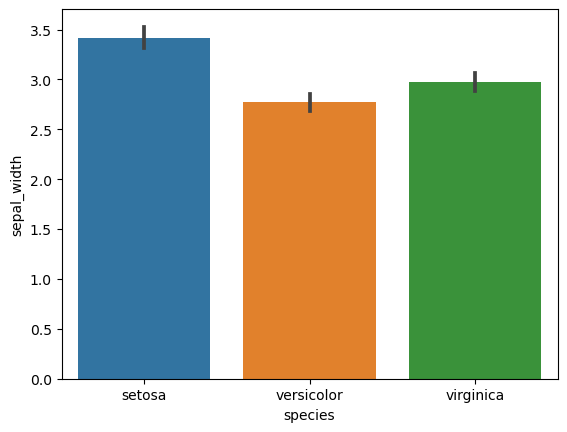

In [86]:
# seaborn does not need to make mean groups
sns.barplot(iris, x="species", y= "sepal_width")

In [71]:
# bar plot on medal data
medal = px.data.medals_long()
medal

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [77]:
# plot bar graph om medal data
fig = px.bar(medal, x= 'medal', y='count')
fig.show()
fig.write_image('./output/04_Bar.png', scale=3)

In [79]:
medal

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [78]:
fig = px.bar(medal, x= 'medal', y='count', color='nation')
fig.show()
fig.write_image('./output/04_Bar_a.png', scale=3)

In [80]:
fig = px.bar(medal, x= 'medal', y='count', color='nation', 
             pattern_shape='nation' )
fig.show()
fig.write_image('./output/04_Bar_b.png', scale=3)

In [81]:
fig = px.bar(medal, x= 'medal', y='count', color='nation', 
             pattern_shape='nation', pattern_shape_sequence= ['.', 'x', '+'] )
fig.show()
fig.write_image('./output/04_Bar_c.png', scale=3)

# 6. Violin plot

In [88]:
# violon plot
fig5 = px.violin(df, x='species' , y='sepal_width', color = 'species')
fig5.show()
# save the plot
fig5.write_image("./output/5_violin.png", scale=3)

In [89]:
# add box=True
fig = px.violin(df, x='species' , y='sepal_width', color = 'species', box=True)
fig.show()
# save the plot
fig.write_image("./output/5_violin_a.png", scale=3)

# 6. Histogram

In [92]:
#6 histogram

fig6 = px.histogram(iris, x='sepal_width',color = 'species')
fig6.show()

# save the plot
fig6.write_image("./output/6_hist.png", scale=3)

# 7. Pie Chart

In [99]:
# for pie chart we need values and names
iris['species'].value_counts().reset_index()

,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


In [101]:
iris_temp = iris['species'].value_counts().reset_index()
iris_temp

,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


In [102]:
# plot pie chart
fig7 = px.pie(iris_temp, values='count', names='species')
fig7.show()
# save the plot
fig7.write_image("./output/7_pie.png", scale=3)

# 8. scatter 3D plot

In [103]:
# scatter 3d plot
fig8 = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig8.show()

# save the plot in html
fig8.write_html("./output/8_scatter3D.html")

# 9. Area chart

In [104]:
# area chart
fig9 = px.area(iris, x='sepal_width', y='sepal_length', color='species')
fig9.show()

# save the plot
fig9.write_image("./output/9_area.png", scale=3)

# 10. Bubble Chart

In [105]:
# bubble chart

fig = px.scatter(iris, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig.show()
fig.write_image("./output/10_bubble.png", scale=3)


# 11. Sunburst chart

In [106]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [111]:
# sunburst chart
fig = px.sunburst(tips, path=['sex', 'smoker'], values='total_bill')
fig.show()

In [112]:
# add , color='tip'
fig = px.sunburst(tips, path=['sex', 'smoker'], values='total_bill', color='tip')
fig.show()

In [113]:
# add hover data '
fig = px.sunburst(tips, path=['sex', 'smoker'], 
                  values='total_bill', color='tip',
                  hover_data=['time'])
fig.show()

In [114]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp')
fig.show()

In [120]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp',
                  hover_data=['iso_alpha'])
fig.show()
fig.write_image("./output/11_sunburst.png", scale=3)

# 12. Parallel Coordinates plot